# HOUSE ROCKET - EMPRESA 

### Questões de negócio: 

* Encontrar as melhores oportunidades de compra de imóveis da House Rocket 

### Qual a problema, a dor, a necessidade do time de negócios? 

* O time do negócio não consegue tomar boas decisões de compra sem analisar os dados 

### Quais hipóteses temos que resolver? 

1. A maioria das casas com 3 quartos são acima da mediana do preço.
2. A maioria das casas com 3 quartos e 2 banheiros são acima da mediana do preço.
3. Casas com com vista para água são 100% mais caras que a mediana do preço.
4. A maioria das casas com porão e 2 andares são mais caras que que a mediana do preço.
5. A maioria das casas com datas acima de 1990 que tiveram reformas são mais caras que a mediana.
6. A maioria das casas antigas são mais caras que a mediana de mercado 
7. A maioria das casas novas são mais caros que a mediana de mercado 


### Quais perguntas do CEO temos que resolver? 

1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?
2. A House Rocket deveria fazer uma reforma para aumentar o preço da venda ?
3. Qual o incremento no preço dado por cada opção de reforma ?
4. Lucro das vendas seguindo a análise ? 


## 0.0 Import 

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt

### 0.1 Functions

In [2]:
def boxplot1(x1, x2, x3, x4, y, df):
    
    plt.subplot(2, 2, 1)
    sns.boxplot(x=x1, y=y, data=df)
    
    plt.subplot(2, 2, 2)
    sns.boxplot(x=x2, y=y, data=df)

    plt.subplot(2, 2, 3)
    sns.boxplot(x=x3, y=y, data=df)

    plt.subplot(2, 2, 4)
    sns.boxplot(x=x4, y=y, data=df);

    return None


def grafdisplot(dt):
    sns.set(rc={'figure.figsize':(20, 10)})
    sns.distplot(dt, kde=True);
    
    return None


## 1.0 Loading Dataseet

In [3]:
data = pd.read_csv("datas\kc_house_data.csv")


In [4]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2.0 Data Description

In [5]:
print(f"Number of rows {data.shape[0]}")
print(f"Number of columns {data.shape[1]}")

Number of rows 21613
Number of columns 21


### 2.1 Data Types

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 2.2 Check NA

In [7]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2.3 Data Trasformer 

There was an error on data. Before of the transformer it was the object. Afeter the transformer is date 

In [8]:
data["date"] = pd.to_datetime( data["date"])

### 2.4 Data Descriptive

In [9]:
#descriptive statistics 

num_attibutes = data.select_dtypes( include=["int64", "float64"]) # quero somente essas colunas

#central tendency -  media, mediana, std, min, max 
import numpy as np 

pd.set_option("display.float.format", lambda x:"%.3f" % x) # arruma para sair de notação científica

media =   pd.DataFrame( num_attibutes.apply(np.mean, axis = 0 )  )
mediana = pd.DataFrame( num_attibutes.apply(np.median, axis = 0) )

# dispersion - std, min, max 
std =   pd.DataFrame( num_attibutes.apply( np.std, axis = 0) )
min_ =  pd.DataFrame( num_attibutes.apply( np.min, axis = 0) )
max_ = pd.DataFrame( num_attibutes.apply( np.max, axis = 0) )
 
    
df2 = pd.concat([media, mediana, std, min_, max_], axis=1)


df2.columns = ["Média", "Mediana", "Desvio Padrão", "Mínimo", "Máximo"]
df2

,Média,Mediana,Desvio Padrão,Mínimo,Máximo
id,4580301520.865,3904930410.000,2876499023.428,1000102.000,9900000190.000
price,540088.142,450000.000,367118.703,75000.000,7700000.000
bedrooms,3.371,3.000,0.930,0.000,33.000
bathrooms,2.115,2.250,0.770,0.000,8.000
sqft_living,2079.900,1910.000,918.420,290.000,13540.000
sqft_lot,15106.968,7618.000,41419.553,520.000,1651359.000
floors,1.494,1.500,0.540,1.000,3.500
waterfront,0.008,0.000,0.087,0.000,1.000
view,0.234,0.000,0.766,0.000,4.000
condition,3.409,3.000,0.651,1.000,5.000


### 2.5 Columns Description

id :uma notação para uma casa

date: a data foi vendida

price: o preço é a meta de previsão

bedrooms:Número de quartos / casa

bathrooms: Número de banheiros / quartos

sqft_living: metragem quadrada da casa

sqft_lot: metragem quadrada do lote

floors :Total de pisos (níveis) na casa

waterfront :casa com vista para a beira-mar

view: foi visualizado

condition :quão boa é a condição geral

grade: nota geral dada à unidade habitacional, com base no sistema de classificação de King County

sqft_above :metragem quadrada da casa além do porão

sqft_basement: metragem quadrada do porão

yr_built :Ano de construção

yr_renovated :ano em que a casa foi reformada

zipcode:código postal

lat: coordenada de latitude

long: coordenada de longitude

sqft_living15 :Área da sala de estar em 2015 (implica-- algumas renovações) Isso pode ou não ter afetado o tamanho do lote

sqft_lot15 :rea lotSize em 2015 (implica-- algumas renovações)

## 3.0 New Considerable Variables 

### 3.1 Price_Median on reference  the ZIP CODE ("Código Postal") 

We need of price_median. To be that we need to create the new column to named "price_median". 

In [10]:
df = pd.DataFrame(data[["zipcode", "price"]].groupby("zipcode").median().reset_index())

In [11]:
df = df.rename( columns = {"price": "price_median"})

In [12]:
df2 = pd.merge(data, df, on="zipcode", how = "inner")

In [13]:
df2["status"] = "NA"


for i in range(len(df2)):
    
    if (df2.loc[i, "price"] < df2.loc[i, "price_median"]) & (df2.loc[i,"condition"] >=2):
            df2.loc[i, "status"] = "compra"
    else: 
           df2.loc[i, "status"] = "não compra"

### 3.2 Real State Level

In [14]:
df2["levels"] = df2["price"].apply(lambda x: "Level 0" if (x >= 0) & (x < 321950) else
                                   "Level 1" if (x>=321950) & (x < 450000) else 
                                   "Level 2" if (x>=450000) & (x < 654000) else 
                                    "Level 3" )

### 3.3 Dormitory type

In [15]:
# Studio == bedrooms igual ou menor que 1
# Apart_or_House == bedrooms entre 2 e 4
# house == bedrooms maior que 4

df2['dormitory_type'] = df2['bedrooms'].apply(lambda x: 'studio' if x <=1 else 
                                              'apart_or_house' if (x >=2) & (x <= 3) else 'house')

### 3.3 Condition Type 

In [16]:
# Bad == Se a condition for menor ou igual a 2
# Regular == Se a condition for igual a 3 ou 4
# Good == Se a condition for igual 5

df2['condition_type'] = df2['condition'].apply(lambda x: 'bad' if x <= 2 else 
                                               'regular' if (x == 3) | (x == 4) else 'good')

### 3.4 Year of Built 

In [17]:
df2["date-age"] = df2["yr_built"].apply(lambda x: "new_house" if x > 2014 else "old_house")

### 3.5 DIF - "PRICE" / "PRICE_MEDIAN"

In [18]:
df2["dif"] = "NA"


for i in range(len(df2)):
     df2.loc[i,"dif"] = round((((1-(df2.loc[i,"price"]) / df2.loc[i,"price_median"])) * 100),2)
     


In [19]:
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,price_median,status,levels,dormitory_type,condition_type,date-age,dif
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,-122.257,1340,5650,278277.000,compra,Level 0,apart_or_house,regular,old_house,20.260
1,4060000240,2014-06-23,205425.000,2,1.000,880,6780,1.000,0,0,...,-122.248,1190,6780,278277.000,compra,Level 0,apart_or_house,regular,old_house,26.180
2,4058801670,2014-07-17,445000.000,3,2.250,2100,8201,1.000,0,2,...,-122.244,2660,8712,278277.000,não compra,Level 1,apart_or_house,regular,old_house,-59.910
3,2976800796,2014-09-25,236000.000,3,1.000,1300,5898,1.000,0,0,...,-122.255,1320,7619,278277.000,compra,Level 0,apart_or_house,regular,old_house,15.190
4,6874200960,2015-02-27,170000.000,2,1.000,860,5265,1.000,0,0,...,-122.272,1650,8775,278277.000,compra,Level 0,apart_or_house,regular,old_house,38.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,2014-10-03,2720000.000,4,3.250,3990,18115,2.000,0,0,...,-122.229,3450,16087,1892500.000,não compra,Level 3,house,regular,old_house,-43.730
21609,2525049113,2014-07-25,1950000.000,4,3.500,4065,18713,2.000,0,0,...,-122.237,3070,18713,1892500.000,não compra,Level 3,house,regular,old_house,-3.040
21610,3262300485,2015-04-21,2250000.000,5,5.250,3410,8118,2.000,0,0,...,-122.236,3410,16236,1892500.000,não compra,Level 3,house,regular,old_house,-18.890
21611,6447300365,2014-11-13,2900000.000,5,4.000,5190,14600,2.000,0,1,...,-122.225,3840,19250,1892500.000,não compra,Level 3,house,regular,old_house,-53.240


## 4.0 Exploratory Analysis

In [20]:
df3 = df2.copy()

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


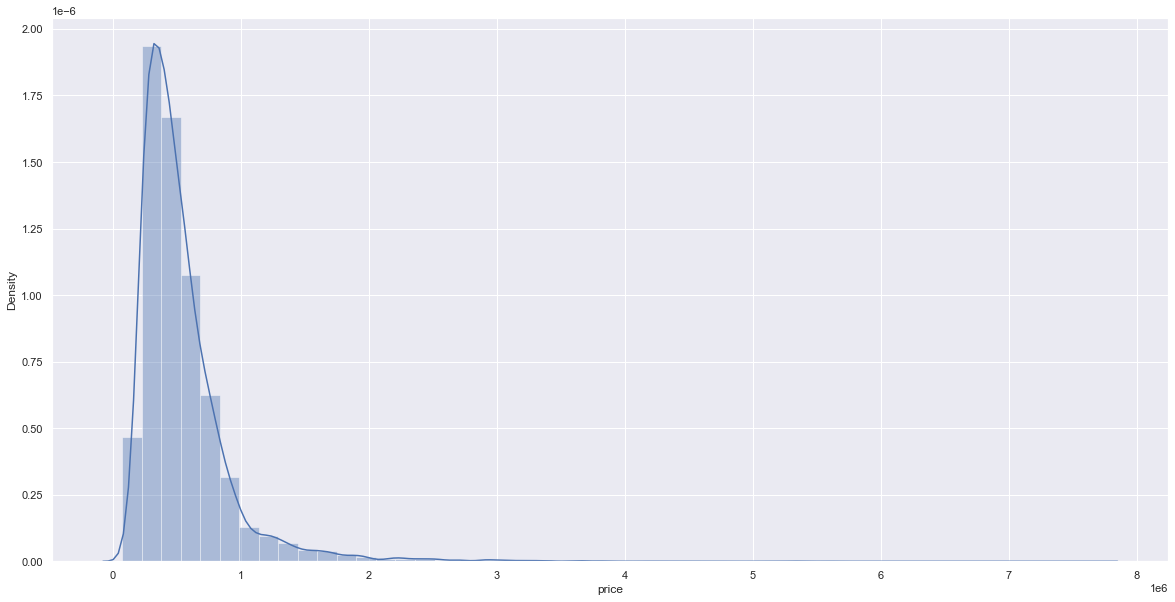

In [21]:
grafdisplot(df3["price"])

In [22]:
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,price_median,status,levels,dormitory_type,condition_type,date-age,dif
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,-122.257,1340,5650,278277.000,compra,Level 0,apart_or_house,regular,old_house,20.260
1,4060000240,2014-06-23,205425.000,2,1.000,880,6780,1.000,0,0,...,-122.248,1190,6780,278277.000,compra,Level 0,apart_or_house,regular,old_house,26.180
2,4058801670,2014-07-17,445000.000,3,2.250,2100,8201,1.000,0,2,...,-122.244,2660,8712,278277.000,não compra,Level 1,apart_or_house,regular,old_house,-59.910
3,2976800796,2014-09-25,236000.000,3,1.000,1300,5898,1.000,0,0,...,-122.255,1320,7619,278277.000,compra,Level 0,apart_or_house,regular,old_house,15.190
4,6874200960,2015-02-27,170000.000,2,1.000,860,5265,1.000,0,0,...,-122.272,1650,8775,278277.000,compra,Level 0,apart_or_house,regular,old_house,38.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,2014-10-03,2720000.000,4,3.250,3990,18115,2.000,0,0,...,-122.229,3450,16087,1892500.000,não compra,Level 3,house,regular,old_house,-43.730
21609,2525049113,2014-07-25,1950000.000,4,3.500,4065,18713,2.000,0,0,...,-122.237,3070,18713,1892500.000,não compra,Level 3,house,regular,old_house,-3.040
21610,3262300485,2015-04-21,2250000.000,5,5.250,3410,8118,2.000,0,0,...,-122.236,3410,16236,1892500.000,não compra,Level 3,house,regular,old_house,-18.890
21611,6447300365,2014-11-13,2900000.000,5,4.000,5190,14600,2.000,0,1,...,-122.225,3840,19250,1892500.000,não compra,Level 3,house,regular,old_house,-53.240


### H1. A maioria das casas com 3 quartos são acima da mediana do preço.


  **FALSA**                       A maioria das casas estão abaixo da mediana de mercado 

In [23]:
df4 = df2.copy()

In [24]:
house_bed3 = len(df4[df4['bedrooms'] == 3])
h_upmedian = len(df4[(df4['bedrooms'] == 3) & (df4['price'] > df4['price'].median())])
h_belowmedian = len(df4[(df4['bedrooms'] == 3) & (df4['price'] <= df4['price'].median())])
print('Quantidade de casas com 3 quartos: {} uninidades'.format(house_bed3))
print('Quantidade de casas acima do valor da mediana dos preços: {} uninidades'.format(h_upmedian))
print('Quantidade de casas abaixo do valor da mediana dos preços: {} unidades'.format(h_belowmedian))

Quantidade de casas com 3 quartos: 9824 uninidades
Quantidade de casas acima do valor da mediana dos preços: 4083 uninidades
Quantidade de casas abaixo do valor da mediana dos preços: 5741 unidades


### H2. A maioria das casas com 3 quartos e 2 banheiros são acima da mediana do preço.

**FALSA** 

Quantidade de casas com 3 quartos: 1048 uninidades
Quantidade de casas acima do valor da mediana dos preços: 423 uninidades
Quantidade de casas abaixo do valor da mediana dos preços: 625 unidades


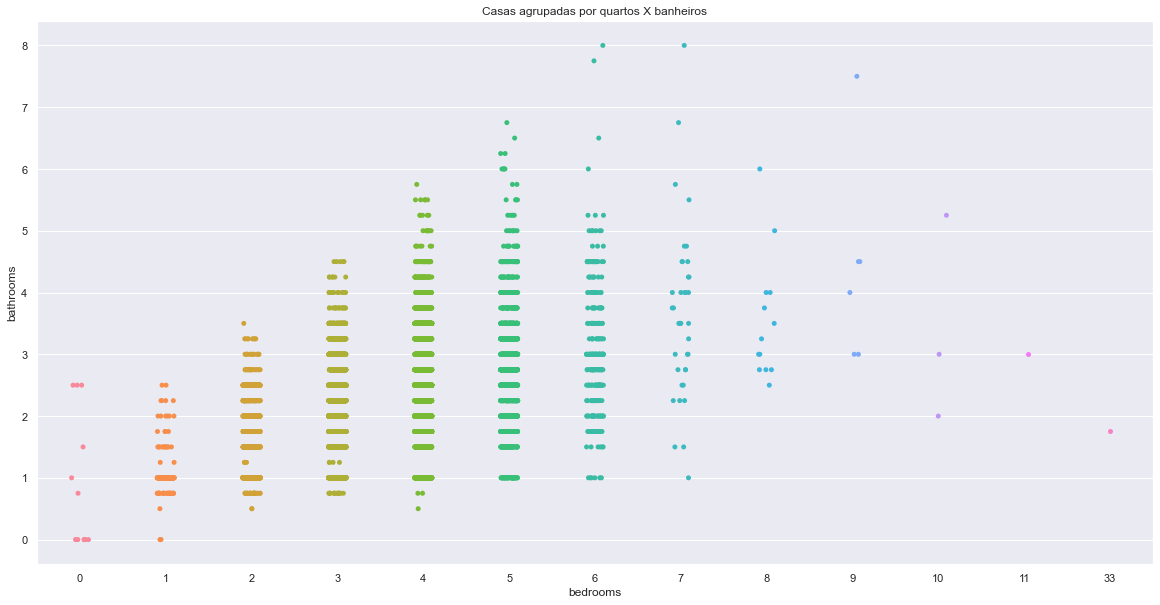

In [25]:
house_bed3 = len(df4[(df4['bedrooms'] == 3) & (df4["bathrooms"] == 2)])
h_upmedian = len(df4[(df4['bedrooms'] == 3) & (df4["bathrooms"] == 2) & (df4['price'] > df4['price'].median())])
h_belowmedian = len(df4[(df4['bedrooms'] == 3) &  (df4["bathrooms"] == 2) & (df4['price'] <= df4['price'].median())])
print('Quantidade de casas com 3 quartos: {} uninidades'.format(house_bed3))
print('Quantidade de casas acima do valor da mediana dos preços: {} uninidades'.format(h_upmedian))
print('Quantidade de casas abaixo do valor da mediana dos preços: {} unidades'.format(h_belowmedian))

plt.title('Casas agrupadas por quartos X banheiros')
sns.stripplot(y = df4['bathrooms'], x = df4['bedrooms']);

### H3. Casas com com vista para água são 100% mais caras que a mediana do preço.


**VERDADEIRO** 

Quantidade de casas mais do que a mediana do preço 154
Quantidade de casas abaixo da mediana do preço 9

Quantidade de casas com mediana maior que ou igual a 100% da mediana do mercado: 119
Quantidade de casas com mediana menor que 100% da mediana do mercado: 35


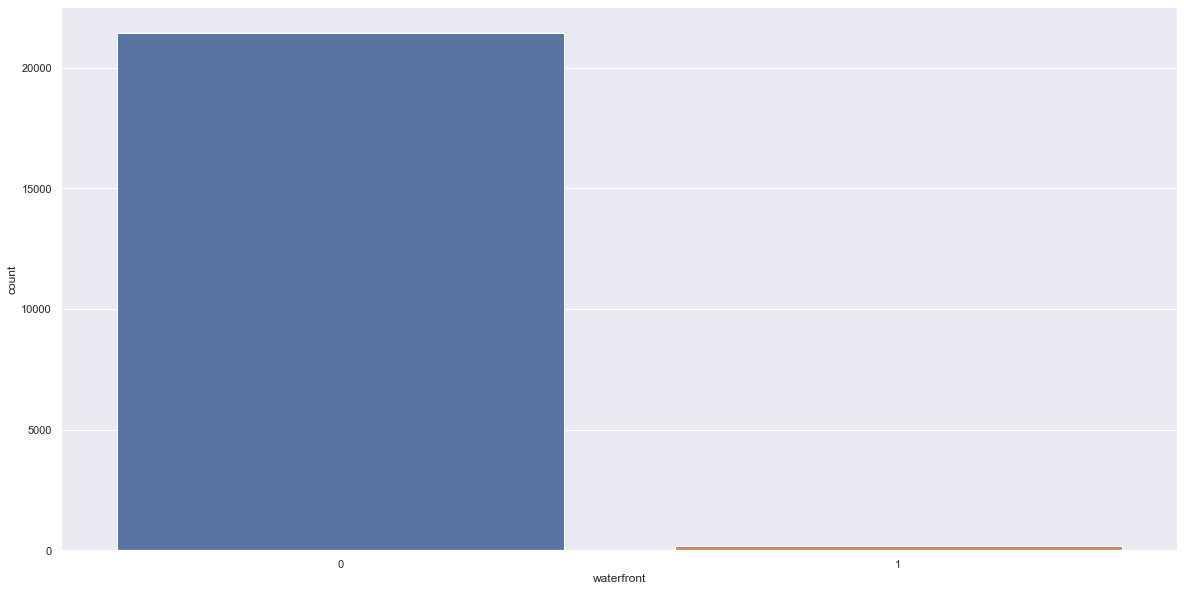

In [26]:
high = len(df4[(df4["waterfront"]==1) & (df4["price"] > df4["price_median"])])
low = len(df4[(df4["waterfront"]==1) & (df4["price"] < df4["price_median"])])
 

print(f"Quantidade de casas mais do que a mediana do preço {high}")
print(f"Quantidade de casas abaixo da mediana do preço {low}")

print("")


waterh_1 = len(df4[(df4["waterfront"]==1) & (df4["price"] > df4["price_median"]) & (df4["dif"] > -100)])
waterh_0 = len(df4[(df4["waterfront"]==1) & (df4["price"] > df4["price_median"]) & (df4["dif"] <= -100)])


print(f"Quantidade de casas com mediana maior que ou igual a 100% da mediana do mercado: {waterh_0}")
print(f"Quantidade de casas com mediana menor que 100% da mediana do mercado: {waterh_1}")

waterh_0 = df4[(df4["waterfront"]==1) & (df4["price"] > df4["price_median"]) & (df4["dif"] < 100)]

sns.countplot(x=df4['waterfront']);

### H4. A maioria das casas com porão e 2 andares são mais caras que que a mediana do preço.


**VERDADEIRO** 

* sqft_basement - porão
* floors - andares (níveis)

Quantidade de casas que tem porão e 2 andares 2963
Quantidade de casas que tem porão e 2 andares mais cara do que a mediana de mercado: 2093
Quantidade de casas que tem porão e 2 andares mais barata do que a mediana de mercado: 870


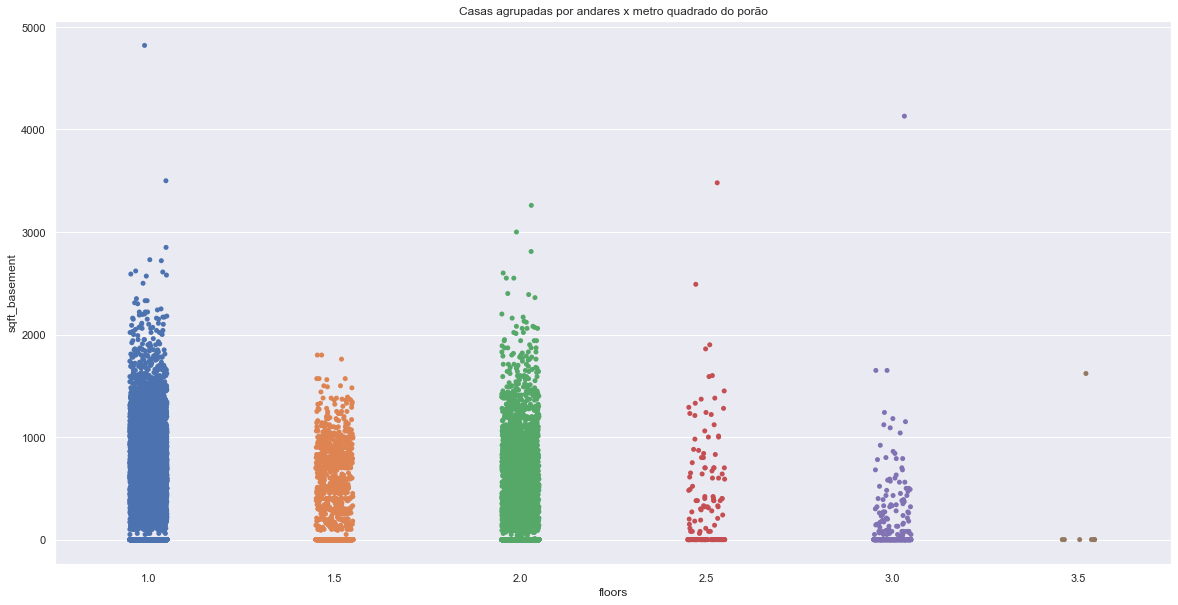

In [27]:
qtd  = len(df4[(df4["sqft_basement"]>0) & (df4["floors"] > 1)])
high = len(df4[(df4["sqft_basement"]>0) & (df4["floors"] > 1) & (df4["price"]> df4["price_median"])])
low  = len(df4[(df4["sqft_basement"]>0) & (df4["floors"] > 1) & (df4["price"]<= df4["price_median"])])


print(f"Quantidade de casas que tem porão e 2 andares {qtd}")
print(f"Quantidade de casas que tem porão e 2 andares mais cara do que a mediana de mercado: {high}")
print(f"Quantidade de casas que tem porão e 2 andares mais barata do que a mediana de mercado: {low}")

plt.title('Casas agrupadas por andares x metro quadrado do porão')
sns.stripplot(y = df4['sqft_basement'], x = df4['floors']);

### H5. A maioria das casas com datas acima de 1990 que tiveram reformas são mais caras que a mediana.


**VERDADEIRO**

In [28]:
total = len(df4[(df4["yr_renovated"] != 0) & (df4["yr_built"] >= 1990)])
total_h = len(df4[(df4["yr_renovated"] != 0) & (df4["yr_built"] >= 1990) & (df4["price"] > df4["price_median"])])
total_l = len(df4[(df4["yr_renovated"] != 0) & (df4["yr_built"] >= 1990) & (df4["price"] < df4["price_median"])])


print(f"Quantidade de casas construídas em 1990 e que tiveram reformas {total}")
print(f"Quantidade de casas que tem o preço acima da mediana de preço {total_h}")
print(f"Quantidade de casas que tem o preço abaixo da mediana de preço {total_l}")


Quantidade de casas construídas em 1990 e que tiveram reformas 7
Quantidade de casas que tem o preço acima da mediana de preço 7
Quantidade de casas que tem o preço abaixo da mediana de preço 0


### H6. A maioria das casas antigas são mais caras que a mediana de mercado 

**VERDADEIRO**

Quantidade de casas antigas 21575
Quantidade de casas antigas com preço acima da mediana de mercado 10845
Quantidade de casas antigas com preço abaixo da mediana de mercado 10730


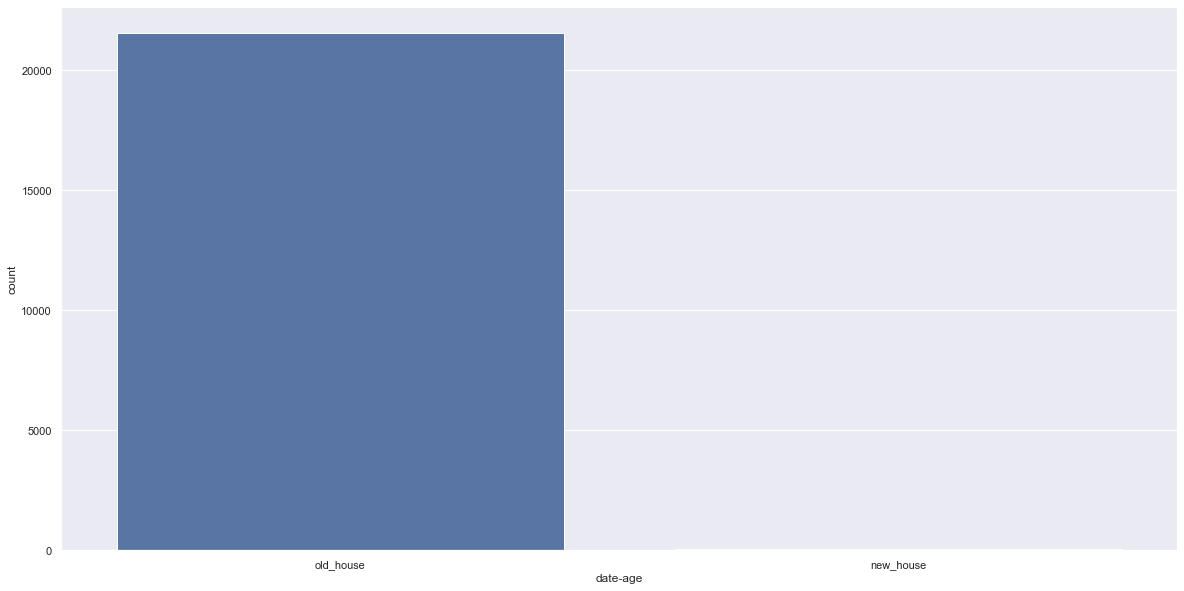

In [29]:
old_houses = len(df4[df4["date-age"] == "old_house"])
old_houses_h = len(df4[(df4["date-age"] == "old_house") & (df4["price"] >= df4["price_median"])])
old_houses_l = len(df4[(df4["date-age"] == "old_house") & (df4["price"] < df4["price_median"])])


print(f"Quantidade de casas antigas {old_houses}")
print(f"Quantidade de casas antigas com preço acima da mediana de mercado {old_houses_h}")
print(f"Quantidade de casas antigas com preço abaixo da mediana de mercado {old_houses_l}")

sns.countplot(x=df4['date-age']);

### H7.  A maioria das casas novas são mais caras que a mediana de mercado 


**VERDADEIRO**

Quantidade de casas novas 38
Quantidade de casas novas com preço acima da mediana de mercado 29
Quantidade de casas novas com preço abaixo da mediana de mercado 9


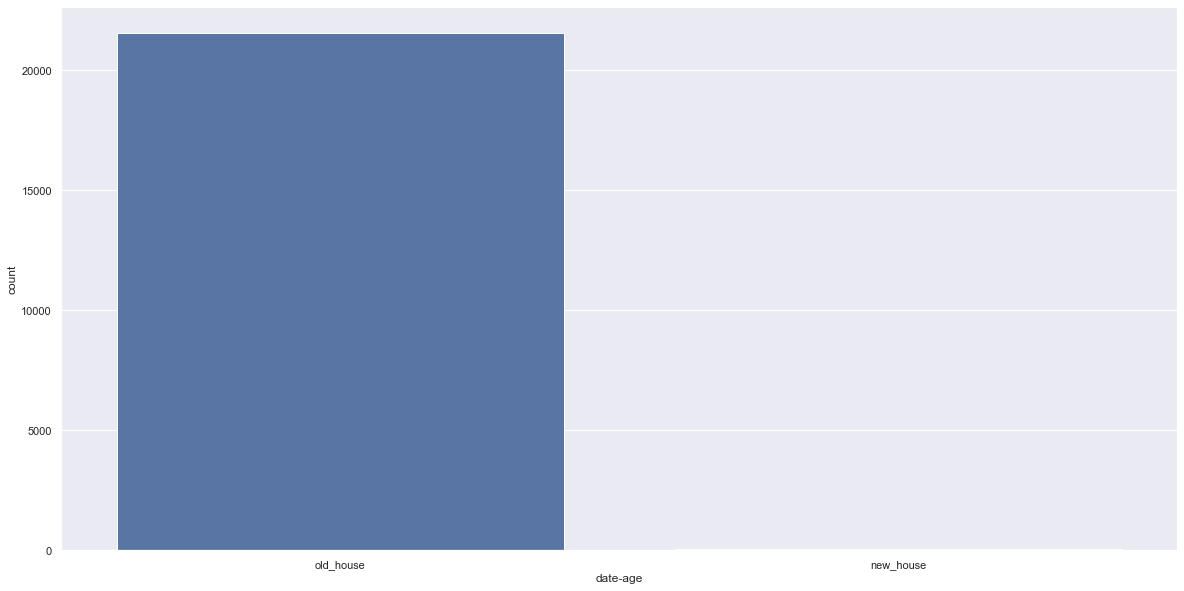

In [30]:
new_house = len(df4[df4["date-age"] == "new_house"])
newh = len(df4[(df4["date-age"] == "new_house") & (df4["price"] >= df4["price_median"])])
newl = len(df4[(df4["date-age"] == "new_house") & (df4["price"] < df4["price_median"])])


print(f"Quantidade de casas novas {new_house}")
print(f"Quantidade de casas novas com preço acima da mediana de mercado {newh}")
print(f"Quantidade de casas novas com preço abaixo da mediana de mercado {newl}")

sns.countplot(x=df4['date-age']);

### 4.1 Tabela de Hipótese

In [31]:
data = {"HIPÓTESE": ["H1", "H2", "H3", "H4", "H5", "H6" , "H7"], 
       "RESULTADO":["FALSA","FALSA","VERDADEIRO","VERDADEIRO","VERDADEIRO", "VERDADEIRO","VERDADEIRO"],
        "RELEVÂNCIA":[ "BAIXA","BAIXA","ALTA","BAIXA","MEDIA","ALTA","BAIXA"]}

hip = pd.DataFrame(data)

hip            

,HIPÓTESE,RESULTADO,RELEVÂNCIA
0,H1,FALSA,BAIXA
1,H2,FALSA,BAIXA
2,H3,VERDADEIRO,ALTA
3,H4,VERDADEIRO,BAIXA
4,H5,VERDADEIRO,MEDIA
5,H6,VERDADEIRO,ALTA
6,H7,VERDADEIRO,BAIXA


## 5.0 Respondendo as perguntas do CEO

### 5.1 Quais casas a House Rocket deveria comprar e por qual preço de compra?


In [32]:
df5 = df4.copy()

total = len(df5[df5["status"] == "compra"])

print(f"Temos ao todo {total} casas abaixo da mediana de mercado")

Temos ao todo 10713 casas abaixo da mediana de mercado


In [33]:
bom = len(df5[(df5["status"] == "compra") & (df5["condition_type"] == "good")])

print(f"Ao todo temos {bom} casas abaixo da mediana de mercado e com condição boa ")

Ao todo temos 703 casas abaixo da mediana de mercado e com condição boa 


**Agora iremos salvar as casas com "condições boas" e "preço" abaixo do "preço de mediana"**

In [34]:
# salvar o dataseet de recomendações de compra

bomsalvar = df5[(df5["status"] == "compra") & (df5["condition_type"] == "good")]
bomsalvar.to_csv('data_upmedian.csv', encoding='utf-8', index=False)

**Vamos salvar em outro datasset os empreendimentos da Hipótese 3: Casas com com vista para água são 100% mais caras que a mediana do preço.**

In [35]:
# salvar o dataseet de recomendações de compra

waterh_0 = df4[(df4["waterfront"]==1) & (df4["price"] > df4["price_median"]) & (df4["dif"] > -100)]
waterh_0.to_csv('house_waterfront_upmedian.csv', encoding='utf-8', index=False)

### 5.2 A House Rocket deveria fazer uma reforma para aumentar o preço da venda?


In [36]:
## filtrando as casas com price < price.median  

houses_buy = df5[df5["price"] <= df5["price_median"]]

* As casas com condições bad deveriam passar por uma reforma para se tornarem mais atraentes. Já as casas em condições regulares precisariam ser selecionadas caso a caso

In [37]:
h_b_r = len(houses_buy[(houses_buy["condition_type"]=="regular") | (houses_buy["condition_type"]=="bad")])
h_b = houses_buy[houses_buy["condition_type"] == "bad"]
h_r = houses_buy[houses_buy["condition_type"] == "regular"]


print(f"São {h_b_r} casas que estão com preço menor que a mediana de mercado, estando em condição má ou regular ")
print(f"São {len(h_b)} casas que estão com preço menor que a mediana de mercado, estando em condição má")
print(f"São {len(h_r)} casas que estão com preço menor que a mediana de mercado, estando em condição regular ")

São 10170 casas que estão com preço menor que a mediana de mercado, estando em condição má ou regular 
São 160 casas que estão com preço menor que a mediana de mercado, estando em condição má
São 10010 casas que estão com preço menor que a mediana de mercado, estando em condição regular 


In [38]:
# casas com vista para o mar acima da medianan e menor que o dobro da mediana no preço
hwf_count = waterh_0[['id', 'condition_type']].groupby('condition_type').count().reset_index()

print('São casas que esteja acima da mediana e que não custe o do dobro do preço com vista para a água que devem ter reformas')

print(hwf_count)

print('As casas que tem a condição bad deve passar por reformas, as regulares devem ser avaliadas caso a caso.')

São casas que esteja acima da mediana e que não custe o do dobro do preço com vista para a água que devem ter reformas
  condition_type  id
0            bad   1
1           good   4
2        regular  30
As casas que tem a condição bad deve passar por reformas, as regulares devem ser avaliadas caso a caso.


### 5.3 Qual o incremento no preço dado por cada opção de reforma?

* Casas com condições bad devem ter um custo de até 30% no valor na reforma.
* Casas com condições regular devem ter um custo de até 10% no valor na reforma.
 * As casas podem ter um acrécimo ou diminuição nessa porcentagem de acordo com o grau de qualidade do imóvel

In [39]:
# concat house to buy
houses_buy_01 =  pd.concat([houses_buy, waterh_0], axis=0)

* Tabela de opções de preço para cada condição de reforma:
* Casas com condições bad: 30% do valor da casa
   * Casa com condições regular: 10% do valor da casa

#### 5.3.1 Tabela com preço com os acréscimos da reforma

In [40]:
# reset o index
houses_buy_01 = houses_buy_01.reset_index().drop(columns='index')

In [41]:
# adcionar o custo da reform ano preço 
houses_buy_01['price+renovation'] = houses_buy_01[['condition_type', 'price']].apply(lambda x: x['price'] * 1.30 if x['condition_type'] == 'bad' 
                                                                                     else x['price'] * 1.10 if x['condition_type'] == 'regular' else 
                                                                                     x['price'], axis=1)

# criar coluna so com os preços estimado da reforam
houses_buy_01['renovation_cost'] = houses_buy_01[['condition_type', 'price', 'price+renovation']].apply(lambda x: 
                                                                                                        x['price+renovation'] - x['price'] 
                                                                                                        if x['condition_type'] == 'bad' 
                                                                                                        else x['price+renovation'] - x['price'] 
                                                                                                        if x['condition_type'] == 'regular' else 0.0, axis=1)


In [42]:
h1 = houses_buy_01.copy()
h1 = h1[h1["price_median"] > h1["price+renovation"]] 
print(f" Temos ao todo {len(h1)} empreendimentos que vale a pena a compra. Os quais teremos um maior retorno, mesmo após a reforma")

 Temos ao todo 8226 empreendimentos que vale a pena a compra. Os quais teremos um maior retorno, mesmo após a reforma


In [43]:
## export dos dados

h1.to_csv('houses_buy.csv', encoding='utf-8', index=False)

### 5.4 Resultado de Venda

In [44]:
df10 = houses_buy_01.copy()

In [45]:
h_total_buy = df10['price'].sum()
print('O total das somas dos preços das casas para compra é ${}.'.format(h_total_buy))

O total das somas dos preços das casas para compra é $4233321368.0.


#### 5.4.2 Soma das casas pela condição e total da soma do custo da reforma.


In [46]:
h_bad = df10[df10['condition_type'] == 'bad']
h_badp = h_bad['price'].sum()
h_badrc = h_bad['renovation_cost'].sum()
print('Somatoria das casa com codições bad ${}, e somatoria custo reforma ${}.'.format(h_badp, h_badrc))

h_bad1 = df10[df10['condition_type'] == 'good']
h_badp1 = h_bad1['price'].sum()
h_badrc1 = h_bad1['renovation_cost'].sum()
print('Somatoria das casa com codições good ${}, e somatoria custo reforma ${}.'.format(h_badp1, h_badrc1))

h_bad2 = df10[df10['condition_type'] == 'regular']
h_badp2 = h_bad2['price'].sum()
h_badrc2 = h_bad2['renovation_cost'].sum()
print('Somatoria das casa com codições regular ${}, e somatoria custo reforma ${}.'.format(h_badp2, h_badrc2))

df10[['price', 'condition_type', 'renovation_cost', 'price+renovation']].groupby('condition_type').sum()

Somatoria das casa com codições bad $43634181.0, e somatoria custo reforma $13090254.3.
Somatoria das casa com codições good $286250420.0, e somatoria custo reforma $0.0.
Somatoria das casa com codições regular $3903436767.0, e somatoria custo reforma $390343676.7000002.


,price,renovation_cost,price+renovation
condition_type,,,
bad,43634181.000,13090254.300,56724435.300
good,286250420.000,0.000,286250420.000
regular,3903436767.000,390343676.700,4293780443.700


#### 5.4.3 Resultado de Vendas

* Casas com condições bad vai ter 10% adcionado ao final para a venda.
* Casas com condições regular vai ter 15% adcionado ao final para a venda.
* Casas com condições good vai ter 20% adcionado ao final para a venda.

In [47]:
# adcionar lucro
df10['price_sales'] = df10[['condition_type', 'price+renovation']].apply(lambda x: x['price+renovation'] * 1.10 if x['condition_type'] == 'bad' else 
                                                                         x['price+renovation'] * 1.20 if x['condition_type'] == 'good' else 
                                                                         x['price+renovation'] * 1.15, axis=1)

In [48]:
# lucro
lucro = df10['price_sales'] - df10['price+renovation']
print('O lucro da vendas das {} casas é de ${}. '.format(len(df10['id']), round(lucro.sum(), 2)))

O lucro da vendas das 10923 casas é de $706989594.08. 


**A coluna abaixo compara os valores de price_median e o preço da venda. Caso a price_median esteja maior que o preço da venda, isso quer dizer que a nossa venda está menor do que o preço da mediana. Consequentemente é um preço mais atrativo, essa venda tem uma alta probabilidade de ser uma venda mais rápida**

In [49]:
df10["velocidade_venda"] = df10[["price_sales", "price_median"]].apply(lambda x: "sim" if x["price_sales"] <= x["price_median"]
                                                                      else "nao", axis=1)

In [50]:
##Export arquivo compra final
df10.to_csv('houses_buy_final.csv', encoding='utf-8', index=False)

In [51]:
df10[['price', 'condition_type', 'renovation_cost', 'price+renovation', "price_sales"]].groupby('condition_type').sum()

,price,renovation_cost,price+renovation,price_sales
condition_type,,,,
bad,43634181.000,13090254.300,56724435.300,62396878.830
good,286250420.000,0.000,286250420.000,343500504.000
regular,3903436767.000,390343676.700,4293780443.700,4937847510.255
